## Game code:

In [45]:
import random as rd
import statistics
import matplotlib.pyplot as plt
%matplotlib inline


def throw_dice():
    return rd.randint(1, 6)


def check_ladder_or_snake(position):
    critical_pos = {1: 40, 8: 10, 36: 52, 43: 62, 49: 79,
                    65: 82, 68: 85, 24: 5, 33: 3, 42: 30,
                    56: 37, 64: 27, 74: 12, 87: 70}

    if position in critical_pos:
        position = critical_pos[position]

    return position


def create_players(num_players):
    players = []

    for i in range(num_players):
        players.append(0)

    return players


def make_a_move(players):
    for index, old_pos in enumerate(players):

        dice = throw_dice()
        new_pos = old_pos + dice

        if new_pos > 90:
            new_pos = 90 - (dice - (90 - old_pos))  # FIKS

        new_pos = check_ladder_or_snake(new_pos)

        players[index] = new_pos

    return players


def single_game(num_players):
    """
    Returns duration of single game.

    Arguments
    ---------
    num_players : int
        Number of players in the game

    Returns
    -------
    num_moves : int
        Number of moves the winning player needed to reach the goal
    """

    players_positions = create_players(num_players)
    num_of_moves = 0
    win_condition = False

    while win_condition == False:
        num_of_moves += 1

        players_positions = make_a_move(players_positions)

        if 90 in players_positions:
            win_condition = True

    return num_of_moves


def multiple_games(num_games, num_players):
    """
    Returns durations of a number of games.

    Arguments
    ---------
    num_games : int
        Number of games to play
    num_players : int
        Number of players in the game

    Returns
    -------
    num_moves : list
        List with the numbedr of moves needed in each game.
    """

    num_moves = []

    for i in range(num_games):
        num_moves.append(single_game(num_players))

    return num_moves


def multi_game_experiment(num_games, num_players, seed):
    """
    Returns durations of a number of games when playing with given seed.

    Arguments
    ---------
    num_games : int
        Number of games to play
    num_players : int
        Number of players in the game
    seed : int
        Seed used to initialise the random number generator

    Returns
    -------
    num_moves : list
        List with the numbedr of moves needed in each game.
    """
    rd.seed(seed)
    num_moves = multiple_games(num_games, num_players)
    return num_moves

# Experiments
### Define parameters

In [46]:
num_games = 100
seed = 3

### Experiment with 1 player


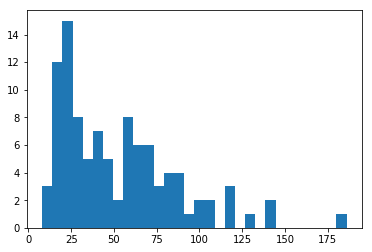

In [47]:
experiment_with_1_player = multi_game_experiment(num_games, 1, seed)

plt.hist(experiment_with_1_player, 30)
plt.show()

### Experiment with 2 players



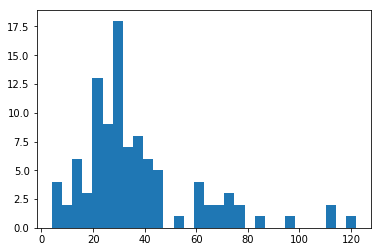

In [48]:
experiment_with_2_player = multi_game_experiment(num_games, 2, seed)

plt.hist(experiment_with_2_player, 30)
plt.show()

### Experiment with 4 players

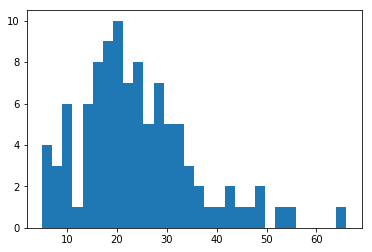

In [49]:
experiment_with_4_player = multi_game_experiment(num_games, 4, seed)

plt.hist(experiment_with_4_player, 30)
plt.show()

### Experiment with 8 players


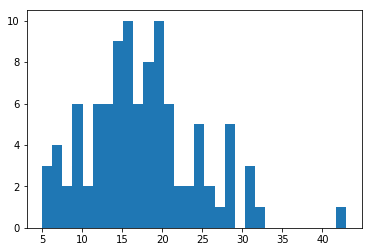

In [50]:
experiment_with_8_player = multi_game_experiment(num_games, 8, seed)

plt.hist(experiment_with_8_player, 30)
plt.show()